In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!unzip /content/drive/MyDrive/Pest.zip

Archive:  /content/drive/MyDrive/Pest.zip
  inflating: pest/test/aphids/jpg_0 - Copy.jpg  
  inflating: pest/test/aphids/jpg_0.jpg  
  inflating: pest/test/aphids/jpg_11 - Copy.jpg  
  inflating: pest/test/aphids/jpg_11.jpg  
  inflating: pest/test/aphids/jpg_13 - Copy.jpg  
  inflating: pest/test/aphids/jpg_13.jpg  
  inflating: pest/test/aphids/jpg_15 - Copy.jpg  
  inflating: pest/test/aphids/jpg_15.jpg  
  inflating: pest/test/aphids/jpg_16.jpg  
  inflating: pest/test/aphids/jpg_19.jpg  
  inflating: pest/test/aphids/jpg_2 - Copy.jpg  
  inflating: pest/test/aphids/jpg_2.jpg  
  inflating: pest/test/aphids/jpg_23.jpg  
  inflating: pest/test/aphids/jpg_24.jpg  
  inflating: pest/test/aphids/jpg_25.jpg  
  inflating: pest/test/aphids/jpg_27.jpg  
  inflating: pest/test/aphids/jpg_29.jpg  
  inflating: pest/test/aphids/jpg_30.jpg  
  inflating: pest/test/aphids/jpg_32.jpg  
  inflating: pest/test/aphids/jpg_33.jpg  
  inflating: pest/test/aphids/jpg_35.jpg  
  inflating: pest/test/a

In [14]:
from keras.preprocessing import image
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob as gb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.applications.mobilenet import MobileNet, preprocess_input

import os # Operating system functionality
import random # Random number generator
import pandas as pd # Data analysis & manipulation
import numpy as np # Array-processing
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
from tensorflow.keras import preprocessing, layers, models, callbacks
from sklearn import metrics # Model evaluation

import json
import datetime
import time
import glob
import os

import shutil
from sklearn.model_selection import train_test_split


print("All Libraries imported...")

All Libraries imported...


In [ ]:
# import os

# # Assuming 'dataset_dir' is the path to your dataset directory
# dataset_dir = '/content/Datasets/Pest_Dataset'

# # List all the directories within 'dataset_dir'
# classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

# # Print the names of all classes
# count=0
# print("Classes in the dataset:")
# for class_name in classes:
#     print(class_name)
#     count += 1

# print(count)


In [ ]:
# # Assuming 'all_classes' is a list containing all 132 pest names as provided
# all_classes = [ ... ]  # your list of 132 pests

# # List of selected popular pest names (as defined above)
# selected_pests = [
#     'aphids',
#     'black cutworm',
#     'brown plant hopper',
#     'cabbage army worm',
#     'cerodonta denticornis',
#     'Chrysomphalus aonidum',
#     'Cicadella viridis',
#     'corn borer',
#     'corn earworm',
#     'cutworm',
#     'Dacus dorsalis(Hendel)',
#     'Deporaus marginatus Pascoe',
#     'Erythroneura apicalis',
#     'fall armyworm',
#     'flea beetle',
#     'Fruit piercing moth',
#     'gall fly',
#     'grasshopper',
#     'green bug',
#     'grub',
#     'Icerya purchasi Maskell',
#     'Jute aphid',
#     'Jute hairy caterpillar',
#     'Jute red mite',
#     'Jute stem girdler',
#     'large cutworm',
#     'leaf beetle',
#     'legume blister beetle',
#     'Locust',
#     'longlegged spider mite',
#     'mealybug',
#     'Miridae',
#     'mites',
#     'mole cricket',
#     'odontothrips loti',
#     'oides decempunctata',
#     'Panonchus citri McGregor',
#     'peach borer',
#     'Pieris canidia',
#     'Pod borer',
#     'Prodenia litura',
#     'red spider',
#     'rice gall midge',
#     'rice leaf roller',
#     'rice leafhopper',
#     'rice water weevil',
#     'sawfly',
#     'small brown plant hopper',
#     'stem borer',
#     'whitefly'
# ]


# # Determine unimportant classes to remove
# unimportant_classes = [pest for pest in all_classes if pest not in selected_pests]
# count=0
# print("Unimportant classes to remove:")
# for pest in unimportant_classes:
#     print(pest)
#     count += 1

# print(count)


**Splitting the Dataset**

In [ ]:
# source_dir = '/content/Datasets/Pest_Dataset'
# train_dir = '/content/Datasets/train_1'
# test_dir = '/content/Datasets/test_1'

In [ ]:
# if not os.path.exists(train_dir):
#     os.makedirs(train_dir)
# if not os.path.exists(test_dir):
#     os.makedirs(test_dir)


In [ ]:
# for label in os.listdir(source_dir):
#     # Paths for each label
#     label_dir = os.path.join(source_dir, label)
#     train_label_dir = os.path.join(train_dir, label)
#     test_label_dir = os.path.join(test_dir, label)

#     # Create label directories in train and test
#     if not os.path.exists(train_label_dir):
#         os.makedirs(train_label_dir)
#     if not os.path.exists(test_label_dir):
#         os.makedirs(test_label_dir)

#     # Get all files for this label
#     files = [file for file in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, file))]

#     # Split files into train and test
#     train_files, test_files = train_test_split(files,train_size=0.8, test_size=0.2, random_state=10)

#     # Move files to the respective directories
#     for file in train_files:
#         shutil.move(os.path.join(label_dir, file), os.path.join(train_label_dir, file))
#     for file in test_files:
#         shutil.move(os.path.join(label_dir, file), os.path.join(test_label_dir, file))


#Data Augmentation

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import os

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale the pixel values from [0, 255] to [0, 1]
    rotation_range=40,       # Random rotations
    width_shift_range=0.2,   # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flips
    fill_mode='nearest'      # Fill strategy for new pixels
)

test_datagen = ImageDataGenerator(
    rescale=1./255           # Only rescaling for test data
)


In [38]:
#aphids
dir_path = '/content/pest/train/stem_borer'
for file in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+file)
    image_array = img_to_array(img)
    image_array=image_array.reshape((1,)+ image_array.shape)

    i=0
    for batch in train_datagen.flow(image_array, save_to_dir='/content/pest/train/stem_borer',save_format="jpg"):
        i+=1
        if i>3:
            break

In [39]:
def loading_model_post():
    train_dir='/content/pest/train'
    test_dir='/content/pest/test'

    training=tf.keras.preprocessing.image.ImageDataGenerator(
        zca_epsilon=1e-06,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        fill_mode="nearest",
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=preprocess_input,
        validation_split=0.05
    ).flow_from_directory(train_dir,batch_size=16,target_size=(224,224), subset="training")

    validing =tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        fill_mode="nearest",
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=preprocess_input,
        validation_split=0.05
    ).flow_from_directory(train_dir, batch_size=16,target_size=(224,224), subset ='validation', shuffle= True)

    testing= tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=preprocess_input,
    ).flow_from_directory(test_dir,batch_size=16,target_size=(224,224), shuffle= True)

Model Creation

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



In [41]:
train_dir = '/content/pest/train'
test_dir = '/content/pest/test'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')


Found 15716 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [44]:
# Dictionary to hold the count of images in each class
class_image_counts = {}

# List all directories in the dataset path
for class_name in os.listdir('/content/pest'):
    class_dir = os.path.join('/content/pest', 'aphids')

    # Check if it's a directory
    if os.path.isdir(class_dir):
        # List all files in the class directory
        images = os.listdir(class_dir)

        # Count and store the number of images
        class_image_counts[class_name] = len(images)

# Print the counts
for class_name, count in class_image_counts.items():
    print(f"{class_name}: {count} images")


In [45]:
train_dir = '/content/pest/train'
test_dir = '/content/pest/test'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')


Found 15716 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [46]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


In [48]:
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)


Epoch 1/10
492/492 [==============================] - 882s 2s/step - loss: 1.8628 - accuracy: 0.3605 - val_loss: 1.7086 - val_accuracy: 0.3778
Epoch 2/10
 56/492 [==>...........................] - ETA: 12:47 - loss: 1.7043 - accuracy: 0.4141

KeyboardInterrupt: 

In [22]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']


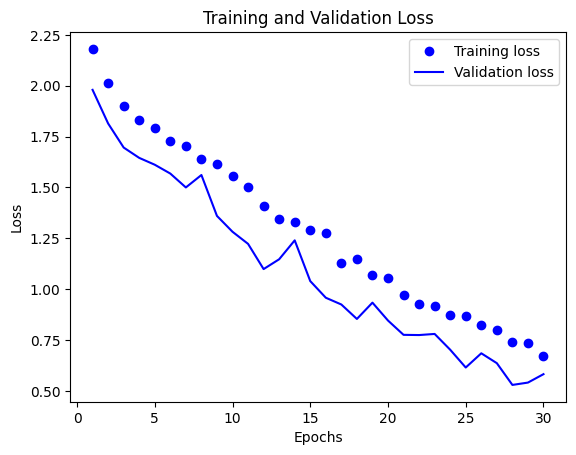

In [23]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

# Load the dataset
pesticide_df = pd.read_csv('/content/drive/MyDrive/pesticides_prediction.csv')


# Load and preprocess the image
test_image = image.load_img('/content/pest/test/sawfly/jpg_18.jpg', target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.

# Predict the class
prediction = model.predict(test_image)
predicted_class = np.argmax(prediction, axis=1)

# Get the class label
label_map = (train_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items())
predicted_label = label_map[predicted_class[0]]

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

print("Predicted class: ", predicted_label)


#Predict the Pesticides for the predicted pest
def predict_pesticide(pest_name):
    # Find all pesticide(s) for the given pest name
    pesticides = pesticide_df[pesticide_df['Pest Name'] == pest_name]['Most Commonly Used Pesticides'].tolist()
    return pesticides


predicted_pest = predicted_label

recommended_pesticide = predict_pesticide(predicted_pest)

print(f"Recommended Pesticide for {predicted_pest}: {recommended_pesticide}")



15/15 [==============================] - 1s 62ms/step - loss: 0.5822 - accuracy: 0.8222
Test Loss: 0.5821662545204163
Test Accuracy: 0.8222222328186035
Predicted class:  sawfly
Recommended Pesticide for sawfly: ['Malathion, Carbaryl, Cypermethrin']


In [15]:
# Save the model
model.save('my_new_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
from tensorflow.keras.models import load_model

In [9]:
best_model = load_model('/content/drive/MyDrive/my_new_model.h5')


Saving hi.jpg to hi (1).jpg
User uploaded file "hi (1).jpg" with length 9053 bytes


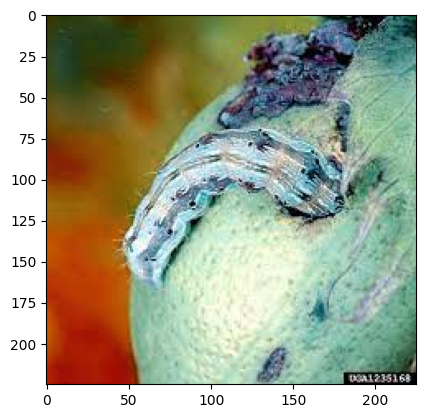

1/1 [==============================] - 0s 262ms/step
Given Image has been affected by mosquito

Suggesstion
********************
Please use the below pesticide
Adulticides, Larvicides
****************************


In [12]:
#fn/content/jpg 14.jpg'

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

img=cv2.imread(fn)
plt.imshow(img)
plt.show()
img = image.load_img(fn, target_size=(150, 150))

pest_class = ['aphids', 'armyworm', 'beetle', 'bollworm','grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
y_prob = best_model.predict(x)
y_class = y_prob.argmax(axis=-1)
y_class = y_class[0]
suggest = ['Imidacloprid, Acetamiprid, Thiamethoxam', 'Chlorpyrifos, Lambda-cyhalothrin, Bifenthrin', 'Imidacloprid, Carbaryl, Malathion, Cypermethrin', 'Chlorantraniliprole, Emamectin benzoate, Spinosad, Indoxacarb', 'Carbaryl, Malathion, Pyrethroids', 'Abamectin, Bifenazate, Chlorfenapyr', 'Adulticides, Larvicides', 'Malathion, Carbaryl, Cypermethrin', 'Neonicotinoids, Pyrethroids, Chlorantraniliprole']
print(f"Given Image has been affected by {pest_class[y_class]}")
print()
print("Suggesstion")
print("*"*20)
print("Please use the below pesticide")
print(suggest[y_class])
print("*"*28)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['PHLevel', 'OrganicMatter',
                                                   'NitrogenContent',
                                                   'PhosphorousContent']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['DistrictRegion',
                                                   'SoilType'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Predicting and evaluating the model
y_pred = rf_pipeline.predict(X_test)
report = classification_report(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

        High       0.29      0.32      0.30        59
         Low       0.35      0.33      0.34        72
      Medium       0.27      0.26      0.27        69

    accuracy                           0.30       200
   macro avg       0.30      0.31      0.30       200
weighted avg       0.31      0.30      0.31       200



In [ ]:
!pip install transformers